In [52]:
# Import dependencies
import pandas as pd
import numpy as np
from decimal import Decimal
from fractions import Fraction
import functools as ft

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,r2_score, accuracy_score, classification_report,precision_score
import matplotlib.pyplot as plt
import yfinance as yf  # Need to install yfinance package 


## Extract the Data

In [45]:

# Dow_df = pd.read_csv('../csv/Dow_Jones_daily.csv')
# Nasdaq_df= pd.read_csv('../csv/Nasdaq_daily.csv')
# sp_df = pd.read_csv('../csv/S&P_daily.csv')
sP500 = yf.Ticker("^GSPC")
sp_df = sP500.history(start="2008-01-01",interval = "1wk",end=None)

NASDAQ = yf.Ticker("^IXIC")
Nasdaq_df = NASDAQ.history(start="2008-01-01",end=None)

DowJ= yf.Ticker("^DJI")

Dow_df = DowJ.history(start="2008-01-01",end=None)


dfs= [Dow_df,Nasdaq_df,sp_df]

Dow_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-01-02 00:00:00-05:00,13261.820312,13279.540039,12991.370117,13043.959961,239580000,0.0,0.0
2008-01-03 00:00:00-05:00,13044.120117,13137.929688,13023.559570,13056.719727,200620000,0.0,0.0
2008-01-04 00:00:00-05:00,13046.559570,13046.719727,12789.040039,12800.179688,304210000,0.0,0.0
2008-01-07 00:00:00-05:00,12801.150391,12884.150391,12733.839844,12827.490234,306700000,0.0,0.0
2008-01-08 00:00:00-05:00,12820.900391,12906.419922,12565.410156,12589.070312,322690000,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-28 00:00:00-04:00,34441.640625,34652.910156,34441.640625,34559.980469,224640000,0.0,0.0
2023-08-29 00:00:00-04:00,34531.121094,34864.421875,34531.121094,34852.671875,262550000,0.0,0.0
2023-08-30 00:00:00-04:00,34847.800781,35025.570312,34811.738281,34890.238281,236070000,0.0,0.0


In [46]:
def datetimeformat(dfs):
    for df in dfs:
        df.index = df.index.strftime('%m/%d/%Y, %r')
        df.index = pd.to_datetime(df.index)
        return
        

In [47]:
datetimeformat(dfs)

In [48]:
Dow_df =Dow_df.reset_index()
sp_df =sp_df.reset_index()

Nasdaq_df =Nasdaq_df.reset_index()
Dow_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2008-01-02,13261.820312,13279.540039,12991.370117,13043.959961,239580000,0.0,0.0
1,2008-01-03,13044.120117,13137.929688,13023.559570,13056.719727,200620000,0.0,0.0
2,2008-01-04,13046.559570,13046.719727,12789.040039,12800.179688,304210000,0.0,0.0
3,2008-01-07,12801.150391,12884.150391,12733.839844,12827.490234,306700000,0.0,0.0
4,2008-01-08,12820.900391,12906.419922,12565.410156,12589.070312,322690000,0.0,0.0
...,...,...,...,...,...,...,...,...
3940,2023-08-28,34441.640625,34652.910156,34441.640625,34559.980469,224640000,0.0,0.0
3941,2023-08-29,34531.121094,34864.421875,34531.121094,34852.671875,262550000,0.0,0.0
3942,2023-08-30,34847.800781,35025.570312,34811.738281,34890.238281,236070000,0.0,0.0
3943,2023-08-31,34909.089844,35070.210938,34719.769531,34721.910156,341900000,0.0,0.0


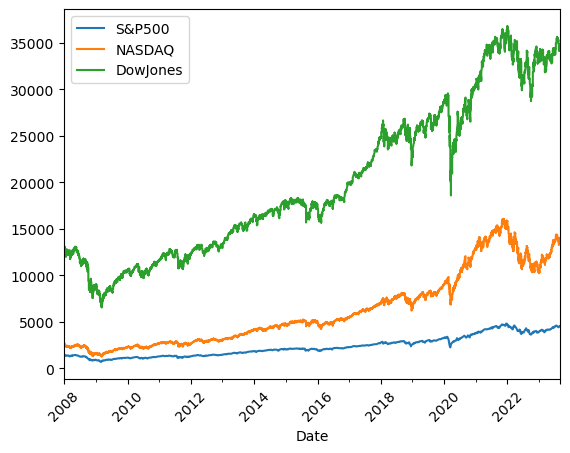

<Figure size 640x480 with 0 Axes>

In [49]:
plot1=sp_df.plot(x="Date",y="Close",label ="S&P500")

labels=['S&P500', 'DowJones', 'NASDAQ']

plot2=Nasdaq_df.plot(ax=plot1,x="Date",y="Close",label ="NASDAQ")

Dow_df.plot(ax=plot2,x="Date",y="Close",label ="DowJones")

plt.xticks(rotation=45)
plt.show()
plt.savefig("Charts&Tables/S&P500,DowJone & NASDAQ ")


In [50]:
 ##Stock prediction analysis for Dow_df  using Random Forest regression model
    
model = RandomForestRegressor()
X= Dow_df[['Open', 'High', 'Low' ,"Volume"]]
X=X[:int(len(Dow_df)-100)]# getting rows except last 100
Y=Dow_df['Close']
Y=Y[:int(len(Dow_df)-100)] # 
model.fit(X,Y)
    

RandomForestRegressor()

In [8]:
test_data = Dow_df[['Open', 'High', 'Low' ,'Volume']].tail(100)#Testing the model with last 100 rows of data

prediction = model.predict(test_data)

Actual = Dow_df[['Date','Close']]
Actual = Actual.rename({'Close': 'Actual_DJ_close'}, axis=1)

pred_table_df = Actual[int(len(Dow_df)-100):] 

pred_table_df.insert (1,value= prediction ,column='Prediction')
 


pred_table_df=pred_table_df.set_index('Date')
pred_table_df.to_csv('Charts&Tables/DJPredicton.csv')  



In [56]:
prediction

array([21515.28330995, 21564.91080174, 21377.57780002, 21240.04924142,
       21302.30736175, 21345.04349478, 21343.11617871, 21343.11617871,
       21343.11617871, 21343.11617871, 21343.11617871, 21343.11617871,
       21322.18685345, 21343.11617871, 21343.11617871, 21343.11617871,
       21343.11617871, 21343.11617871, 21343.11617871, 21343.11617871,
       21362.18199074, 21345.04349478, 21087.08525069, 21049.60777369,
       21038.44669211, 21036.49107224, 21097.13421735, 21345.04349478,
       21370.05827208, 21390.55805055, 21390.55805055, 21345.04349478,
       21302.30736175, 21302.30736175, 21291.1406466 , 21002.55074797,
       20991.29185128, 20991.29185128, 20936.71654675, 20922.30161818,
       20971.03058975, 20991.29185128, 20991.29185128, 20936.71654675,
       20991.29185128, 21049.60777369, 21368.59841258, 21385.51823141,
       21302.30736175, 21097.13421735, 21087.08525069, 21345.04349478,
       21362.18199074, 21390.55805055, 21343.11617871, 21343.11617871,
      

In [9]:
Actual

,Date,Actual_DJ_close
0,2008-01-02,13043.959961
1,2008-01-03,13056.719727
2,2008-01-04,12800.179688
3,2008-01-07,12827.490234
4,2008-01-08,12589.070312
...,...,...
3940,2023-08-28,34559.980469
3941,2023-08-29,34852.671875
3942,2023-08-30,34890.238281
3943,2023-08-31,34721.910156


In [10]:
pred_table_df

,Prediction,Actual_DJ_close
Date,,
2023-04-12,33776.262305,33646.500000
2023-04-13,33940.777617,34029.691406
2023-04-14,34001.706289,33886.468750
2023-04-17,33907.945352,33987.179688
2023-04-18,33907.150273,33976.628906
...,...,...
2023-08-28,34573.745273,34559.980469
2023-08-29,34705.883906,34852.671875
2023-08-30,34959.897695,34890.238281


In [61]:
r2_score(pred_table_df['Prediction'], pred_table_df["Actual_DJ_close"])


0.9817157517069635

Accuracy score is 98% 

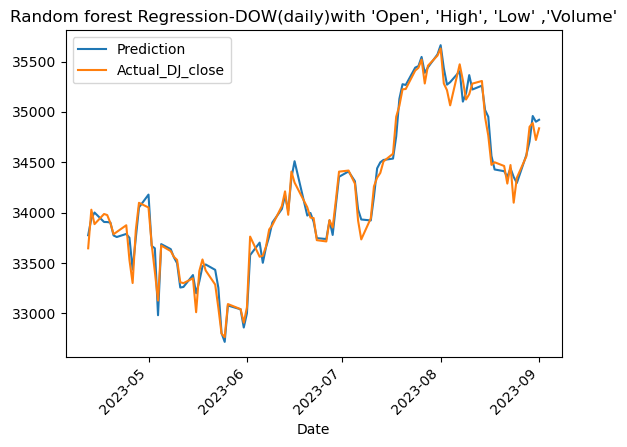

In [11]:
plot =pred_table_df.plot()
plt.xticks(rotation=45)
plt.title("Random forest Regression-DOW(daily)with 'Open', 'High', 'Low' ,'Volume'")

plt.savefig("Charts&Tables/RFR_Dowj_with_historicaldata_plot")


In [12]:
import pickle

pickle.dump(model, open('model/DJRFmodel.pkl', 'wb')) #write as binary
model = pickle.load(open('model/DJRFmodel.pkl', 'rb'))#read as binary


######################   
#Random regressor model for Dow jones (Monthly average)
with Macro economic indicators CPI,FDD,Inflation Rate and unemployment rate

In [13]:
indexmacro_monthly = pd.read_csv('CleanedCSVs/Monthly_Macro_Indexes.csv')
indexmacro_monthly.head()


,Unnamed: 0,Year_Month,DFF,Inflation_Rate,Average_Dow,Average_Nasdaq,Average_S&P,CPIAUCSL,UNRATE
0,0,2008-01-01,3.931429,2.275238,13819.358333,2419.136429,1377.010714,212.174,5.0
1,1,2008-02-01,2.962500,2.332500,13656.919500,2328.320750,1355.853000,212.687,4.9
2,2,2008-03-01,2.629000,2.419000,13219.863250,2254.988500,1317.693250,213.448,5.1
3,3,2008-04-01,2.267727,2.312727,13754.749773,2367.043864,1369.944318,213.942,5.0
4,4,2008-05-01,1.993333,2.420000,14140.645238,2481.568810,1402.601667,215.208,5.4


In [14]:
indexmacro_monthly = indexmacro_monthly.drop(columns = ["Unnamed: 0","Average_Nasdaq","Average_S&P"],axis =1)

In [15]:
indexmacro_monthly

,Year_Month,DFF,Inflation_Rate,Average_Dow,CPIAUCSL,UNRATE
0,2008-01-01,3.931429,2.275238,13819.358333,212.174,5.0
1,2008-02-01,2.962500,2.332500,13656.919500,212.687,4.9
2,2008-03-01,2.629000,2.419000,13219.863250,213.448,5.1
3,2008-04-01,2.267727,2.312727,13754.749773,213.942,5.0
4,2008-05-01,1.993333,2.420000,14140.645238,215.208,5.4
...,...,...,...,...,...,...
182,2023-03-01,4.653043,2.302174,39839.831957,301.808,3.5
183,2023-04-01,4.830000,2.267368,41109.224737,302.918,3.4
184,2023-05-01,5.045909,2.213636,41314.279091,303.294,3.7
185,2023-06-01,5.075714,2.200476,43315.891429,303.841,3.6


In [16]:
model1 = RandomForestRegressor()
X= indexmacro_monthly[['DFF', 'Inflation_Rate', 'CPIAUCSL' ,"UNRATE"]]
X=X[:int(len(indexmacro_monthly)-100)]#leaving last 100 rows of data
Y=indexmacro_monthly['Average_Dow']
Y=Y[:int(len(indexmacro_monthly)-100)]
model1.fit(X,Y)
    

RandomForestRegressor()

In [17]:
test_data

,Open,High,Low,Volume
3845,33764.210938,33895.429688,33593.320312,260300000
3846,33668.968750,34054.988281,33605.171875,277230000
3847,33981.710938,34082.941406,33730.851562,276720000
3848,33930.460938,33991.230469,33796.910156,234530000
3849,33965.160156,34018.621094,33791.890625,253570000
...,...,...,...,...
3940,34441.640625,34652.910156,34441.640625,224640000
3941,34531.121094,34864.421875,34531.121094,262550000
3942,34847.800781,35025.570312,34811.738281,236070000
3943,34909.089844,35070.210938,34719.769531,341900000


In [18]:
prediction


array([33776.26230469, 33940.77761719, 34001.70628906, 33907.94535156,
       33907.15027344, 33902.55050781, 33774.03933594, 33758.76191406,
       33789.22132813, 33750.76199219, 33435.55765625, 33749.66859375,
       34052.47429687, 34179.73777344, 33669.806875  , 33646.77148438,
       32982.26107422, 33688.14910156, 33638.51441406, 33556.85078125,
       33498.80527344, 33257.21699219, 33262.95464844, 33381.1165625 ,
       33200.44164063, 33317.04792969, 33466.9034375 , 33486.02285156,
       33432.74324219, 33254.05882813, 32804.98244141, 32717.67548828,
       33079.05078125, 33041.10195312, 32860.06957031, 33002.16988281,
       33578.80890625, 33702.95019531, 33502.53476563, 33655.7209375 ,
       33763.81851562, 33902.59925781, 34036.77230469, 34168.48542969,
       34019.41457031, 34343.78300781, 34511.11332031, 33971.67445313,
       33997.07101562, 33910.17234375, 33747.63335938, 33738.54015625,
       33923.61351563, 33779.38296875, 34073.21628906, 34356.40296875,
      

In [63]:
test_data = indexmacro_monthly[['DFF', 'Inflation_Rate', 'CPIAUCSL' ,"UNRATE"]].tail(100)
prediction = model1.predict(test_data)

Actual = indexmacro_monthly[['Year_Month','Average_Dow']]

pred_table_df1 = Actual[int(len(indexmacro_monthly)-100):] 

pred_table_df1.insert(1, value=prediction, column='prediction')

pred_table_df1=pred_table_df1.set_index('Year_Month')


pred_table_df1.to_csv('Charts&Tables/DJ_macro_pred.csv')  

pred_table_df1

,prediction,Average_Dow
Year_Month,,
2015-02-01,21515.283310,21723.983158
2015-03-01,21564.910802,21776.730000
2015-04-01,21377.577800,21961.926190
2015-05-01,21240.049241,22068.910500
2015-06-01,21302.307362,22003.325455
...,...,...
2023-01-01,20916.733594,39807.185500
2023-02-01,20922.356478,41204.049211
2023-03-01,20922.356478,39839.831957


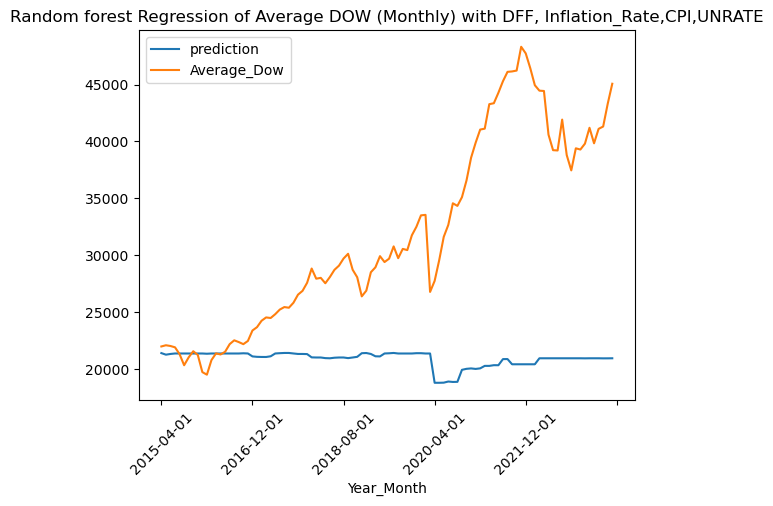

In [21]:
pred_table_df1.plot()
plt.xticks(rotation=45)
plt.title("Random forest Regression of Average DOW (Monthly) with DFF, Inflation_Rate,CPI,UNRATE")

plt.savefig("Charts&Tables/RFR_Dowj_MacroIndicators_plot")


#Random forest Classifier model

In [29]:
indexmacro_monthly

,Year_Month,DFF,Inflation_Rate,Average_Dow,CPIAUCSL,UNRATE,next_Average_Dow,Target_Average_Dow
0,2008-01-01,3.931429,2.275238,13819.358333,212.174,5.0,13656.919500,0
1,2008-02-01,2.962500,2.332500,13656.919500,212.687,4.9,13219.863250,0
2,2008-03-01,2.629000,2.419000,13219.863250,213.448,5.1,13754.749773,1
3,2008-04-01,2.267727,2.312727,13754.749773,213.942,5.0,14140.645238,1
4,2008-05-01,1.993333,2.420000,14140.645238,215.208,5.4,13669.384286,0
...,...,...,...,...,...,...,...,...
181,2023-02-01,4.565263,2.333684,41204.049211,301.648,3.6,39839.831957,0
182,2023-03-01,4.653043,2.302174,39839.831957,301.808,3.5,41109.224737,1
183,2023-04-01,4.830000,2.267368,41109.224737,302.918,3.4,41314.279091,1
184,2023-05-01,5.045909,2.213636,41314.279091,303.294,3.7,43315.891429,1


In [30]:
indexmacro_monthly["next_Average_Dow"] = indexmacro_monthly["Average_Dow"].shift(-1)
indexmacro_monthly["Target_Average_Dow"] = (indexmacro_monthly["next_Average_Dow"] > indexmacro_monthly["Average_Dow"]).astype(int)


C:\Users\sudha\AppData\Local\Temp\ipykernel_9568\3753308633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indexmacro_monthly["next_Average_Dow"] = indexmacro_monthly["Average_Dow"].shift(-1)
C:\Users\sudha\AppData\Local\Temp\ipykernel_9568\3753308633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indexmacro_monthly["Target_Average_Dow"] = (indexmacro_monthly["next_Average_Dow"] > indexmacro_monthly["Average_Dow"]).astype(int)


In [34]:
indexmacro_monthly['next_Average_Dow'].isnull().sum()


0

In [32]:
indexmacro_monthly

,Year_Month,DFF,Inflation_Rate,Average_Dow,CPIAUCSL,UNRATE,next_Average_Dow,Target_Average_Dow
0,2008-01-01,3.931429,2.275238,13819.358333,212.174,5.0,13656.919500,0
1,2008-02-01,2.962500,2.332500,13656.919500,212.687,4.9,13219.863250,0
2,2008-03-01,2.629000,2.419000,13219.863250,213.448,5.1,13754.749773,1
3,2008-04-01,2.267727,2.312727,13754.749773,213.942,5.0,14140.645238,1
4,2008-05-01,1.993333,2.420000,14140.645238,215.208,5.4,13669.384286,0
...,...,...,...,...,...,...,...,...
181,2023-02-01,4.565263,2.333684,41204.049211,301.648,3.6,39839.831957,0
182,2023-03-01,4.653043,2.302174,39839.831957,301.808,3.5,41109.224737,1
183,2023-04-01,4.830000,2.267368,41109.224737,302.918,3.4,41314.279091,1
184,2023-05-01,5.045909,2.213636,41314.279091,303.294,3.7,43315.891429,1


In [33]:
indexmacro_monthly = indexmacro_monthly.dropna()


In [35]:
##########code for random forest classifier with scaling
y= indexmacro_monthly["Target_Average_Dow"]
X= indexmacro_monthly.drop(columns=['Target_Average_Dow','Year_Month'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()
#Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [39]:
#predicting stock price for last 100 days by training the model with previous history data which is from 2008

model_RFC = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = indexmacro_monthly.iloc[:-100]# all rows except last 100 rows/days 
test = indexmacro_monthly.iloc[-100:] #last 100 days or rows

# model_RFC = model_RFC.fit(X_train_scaled, y_train)  #code for scaled 

predictors =['DFF', 'Inflation_Rate', 'CPIAUCSL' ,'UNRATE']
model_RFC.fit(train[predictors], train["Target_Average_Dow"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [40]:
# preds = model_RFC.predict(X_test_scaled) #code for scaled dat
# preds
preds = model_RFC.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target_Average_Dow"], preds)
y_test =test["Target_Average_Dow"]

In [41]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, preds)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, preds)
acc_score


0.66

#Accuracy score is 66%  for Random regressor model for Dow jones 
with feature parameters CPI,FDD,Inflation Rate and unemployment rate

In [42]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, preds))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,0,34
Actual 1,0,66


Accuracy Score : 0.66
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.66      1.00      0.80        66

    accuracy                           0.66       100
   macro avg       0.33      0.50      0.40       100
weighted avg       0.44      0.66      0.52       100



c:\Users\sudha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sudha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sudha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
importances = model_RFC.feature_importances_
sorted(zip(model_RFC.feature_importances_, X.columns), reverse=True)

[(0.0, 'Inflation_Rate'),
 (0.0, 'DFF'),
 (0.0, 'CPIAUCSL'),
 (0.0, 'Average_Dow')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

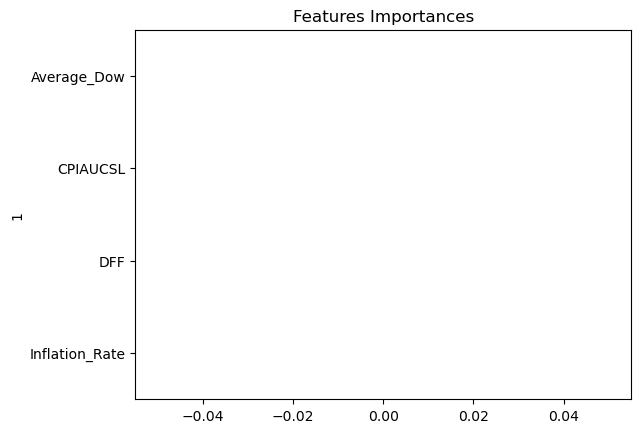

In [ ]:
importances_df = pd.DataFrame(sorted(zip(model_RFC.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


Random Forest Model

Predictions using Random Forest Model

Unsupervised learning 

In [ ]:
indexmacro_monthly.head()

,Year_Month,DFF,Inflation_Rate,Average_Dow,CPIAUCSL,UNRATE,next_Average_Dow,Target_Average_Dow
0,2008-01-01,3.931429,2.275238,13819.358333,212.174,5.0,13656.919500,0
1,2008-02-01,2.962500,2.332500,13656.919500,212.687,4.9,13219.863250,0
2,2008-03-01,2.629000,2.419000,13219.863250,213.448,5.1,13754.749773,1
3,2008-04-01,2.267727,2.312727,13754.749773,213.942,5.0,14140.645238,1
4,2008-05-01,1.993333,2.420000,14140.645238,215.208,5.4,13669.384286,0


In [ ]:
import hvplot.pandas

indexmacro_monthly.hvplot.line(
    width=900,
    height=500,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [ ]:
indexmacro_monthly.columns


Index(['Year_Month', 'DFF', 'Inflation_Rate', 'Average_Dow', 'CPIAUCSL',
       'UNRATE', 'next_Average_Dow', 'Target_Average_Dow'],
      dtype='object')

In [ ]:
scaled_Macro_data = StandardScaler().fit_transform(indexmacro_monthly[["DFF","Inflation_Rate","Average_Dow","CPIAUCSL","UNRATE" ]])

scaled_Macro_data[0:3]

array([[ 2.71310079,  0.6867935 , -0.89723281, -1.34111496, -0.53075145],
       [ 1.86774023,  0.82606548, -0.91225687, -1.31916642, -0.57482277],
       [ 1.57677167,  1.03645014, -0.95268046, -1.28660729, -0.48668012]])

In [ ]:
scaled_Macro_data = pd.DataFrame(scaled_Macro_data,columns=["DFF","Inflation_Rate","Average_Dow","CPIAUCSL","UNRATE" ])


scaled_Macro_data["Year_Month"] = indexmacro_monthly["Year_Month"]

scaled_Macro_data_df =scaled_Macro_data.set_index('Year_Month')


# Display sample data
scaled_Macro_data_df.head()

,DFF,Inflation_Rate,Average_Dow,CPIAUCSL,UNRATE
Year_Month,,,,,
2008-01-01,2.713101,0.686794,-0.897233,-1.341115,-0.530751
2008-02-01,1.867740,0.826065,-0.912257,-1.319166,-0.574823
2008-03-01,1.576772,1.036450,-0.952680,-1.286607,-0.486680
2008-04-01,1.261572,0.777974,-0.903208,-1.265472,-0.530751
2008-05-01,1.022172,1.038882,-0.867517,-1.211306,-0.354466


In [ ]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))


In [ ]:
from sklearn.cluster import KMeans

inertia =[]
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(scaled_Macro_data_df)
    inertia.append(k_model.inertia_)


c:\Users\sudha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sudha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sudha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sudha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sudha\anaconda3\lib\site-packages\sklearn\clust

In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


df_elbow.head()


,k,inertia
0,1,930.000000
1,2,552.653149
2,3,424.366646
3,4,339.215660
4,5,256.840007


In [ ]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title = "Elbow_curve for original macro index data",
    xticks=k
)
elbow_plot

:Curve   [k]   (inertia)

In [ ]:
model = KMeans(n_clusters=5, random_state=1)
model.fit(scaled_Macro_data_df)


c:\Users\sudha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled data
K_predictions = model.predict(scaled_Macro_data_df)


# Print the resulting array of cluster values.
K_predictions

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
index_data_prediction_df = scaled_Macro_data_df.copy()
index_data_prediction_df['macro_segments'] = K_predictions
index_data_prediction_df.head(30)

,DFF,Inflation_Rate,Average_Dow,CPIAUCSL,UNRATE,macro_segments
Year_Month,,,,,,
2008-01-01,2.713101,0.686794,-0.897233,-1.341115,-0.530751,2
2008-02-01,1.867740,0.826065,-0.912257,-1.319166,-0.574823,2
2008-03-01,1.576772,1.036450,-0.952680,-1.286607,-0.486680,2
2008-04-01,1.261572,0.777974,-0.903208,-1.265472,-0.530751,2
2008-05-01,1.022172,1.038882,-0.867517,-1.211306,-0.354466,0
2008-06-01,1.029235,1.162808,-0.911104,-1.114827,-0.266323,0
2008-07-01,1.044645,1.084210,-0.994833,-1.048382,-0.178181,0
2008-08-01,1.015940,0.526964,-0.971100,-1.062330,-0.045967,0
2008-09-01,0.909582,-0.381055,-1.028214,-1.054329,-0.045967,0


In [ ]:
#scatter plot for Average dow with inflation rate
original_scater_plot = index_data_prediction_df.hvplot.scatter(
    x="CPIAUCSL",
    y="Average_Dow",#"Inflation_Rate",
    by="macro_segments",
    hover_cols = "Average_Dow"
)
original_scater_plot

:NdOverlay   [macro_segments]
   :Scatter   [CPIAUCSL]   (Average_Dow)

In [ ]:
#scatter plot for Average dow with inflation rate
original_scater_plot = index_data_prediction_df.hvplot.scatter(
    x="Inflation_Rate",
    y="Average_Dow",#"DFF",
    by="macro_segments",
    hover_cols = "Average_Dow"
)
original_scater_plot

:NdOverlay   [macro_segments]
   :Scatter   [Inflation_Rate]   (Average_Dow)

In [ ]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

In [ ]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_data_pca = pca.fit_transform(index_data_prediction_df)

# View the first five rows of the DataFrame. 
market_data_pca[0:5]

array([[ 0.61679474,  0.31385295,  3.0739677 ],
       [ 0.37589556,  0.02948166,  2.47865276],
       [ 0.26879688, -0.23961029,  2.30080756],
       [ 0.18126557, -0.05575295,  1.97338096],
       [-1.03935886, -0.65894808,  2.00543718]])

In [ ]:
pca.explained_variance_ratio_

array([0.64943517, 0.15174805, 0.11294225])

In [ ]:
total_variance = np.sum(pca.explained_variance_ratio_)
total_variance


0.9141254711432599

In [ ]:
df_market_data_pca = pd.DataFrame(
    market_data_pca,
    columns=["PC1", "PC2","PC3"]
)


df_market_data_pca["Year_Month"] = index_data_prediction_df.index

df_market_data_pca =df_market_data_pca.set_index("Year_Month")

df_market_data_pca


,PC1,PC2,PC3
Year_Month,,,
2008-01-01,0.616795,0.313853,3.073968
2008-02-01,0.375896,0.029482,2.478653
2008-03-01,0.268797,-0.239610,2.300808
2008-04-01,0.181266,-0.055753,1.973381
2008-05-01,-1.039359,-0.658948,2.005437
...,...,...,...
2023-02-01,5.043121,-0.014564,1.289622
2023-03-01,5.023480,0.093953,1.391590
2023-04-01,5.154060,0.193273,1.432437


In [ ]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Append the value of the computed inertia from the `inertia_` attribute of teh KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_market_data_pca)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

c:\Users\sudha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sudha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sudha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sudha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sudha\anaconda3\lib\site-packages\sklearn\clust

,k,inertia
0,1,1106.661920
1,2,528.413739
2,3,368.016511
3,4,257.007805
4,5,178.154838


In [ ]:
# Plot the Elbow Curve
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [ ]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_market_data_pca)

# Make predictions
k_3 = model.predict(df_market_data_pca)

# Create a copy of the PCA DataFrame
market_pca_predictions_df = df_market_data_pca.copy()

# Add a class column with the labels
market_pca_predictions_df["macro_segments"] = k_3

c:\Users\sudha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
market_pca_predictions_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="macro_segments"
)

:NdOverlay   [macro_segments]
   :Scatter   [PC1]   (PC2)